In [215]:
import arviz as az
import numpy as np
import pandas as pd
import aesara.tensor as at
import pymc as pm

In [64]:
data = pd.read_csv("ortho.csv")
data

,y,age,Subject,Sex,Sex_coded
0,26.0,8,M01,Male,1
1,25.0,10,M01,Male,1
2,29.0,12,M01,Male,1
3,31.0,14,M01,Male,1
4,21.5,8,M02,Male,1
...,...,...,...,...,...
103,19.5,14,F10,Female,-1
104,24.5,8,F11,Female,-1
105,25.0,10,F11,Female,-1
106,28.0,12,F11,Female,-1


In [262]:
subject_series = data.groupby(['Subject']).count()

In [263]:
num_dates = T.constant(len(subject_series), dtype = "int32")

NameError: name 'T' is not defined

In [65]:
data["subject_idx"] = np.repeat(np.arange(0, 27), 4)
data

,y,age,Subject,Sex,Sex_coded,subject_idx
0,26.0,8,M01,Male,1,0
1,25.0,10,M01,Male,1,0
2,29.0,12,M01,Male,1,0
3,31.0,14,M01,Male,1,0
4,21.5,8,M02,Male,1,1
...,...,...,...,...,...,...
103,19.5,14,F10,Female,-1,25
104,24.5,8,F11,Female,-1,26
105,25.0,10,F11,Female,-1,26
106,28.0,12,F11,Female,-1,26


In [66]:
y_matrix = data.pivot(index="subject_idx", columns=["age"])["y"].to_numpy()
# now each row represents a subject, columns represent ages 8, 10, 12, 14
y_matrix

array([[26. , 25. , 29. , 31. ],
       [21.5, 22.5, 23. , 26.5],
       [23. , 22.5, 24. , 27.5],
       [25.5, 27.5, 26.5, 27. ],
       [20. , 23.5, 22.5, 26. ],
       [24.5, 25.5, 27. , 28.5],
       [22. , 22. , 24.5, 26.5],
       [24. , 21.5, 24.5, 25.5],
       [23. , 20.5, 31. , 26. ],
       [27.5, 28. , 31. , 31.5],
       [23. , 23. , 23.5, 25. ],
       [21.5, 23.5, 24. , 28. ],
       [17. , 24.5, 26. , 29.5],
       [22.5, 25.5, 25.5, 26. ],
       [23. , 24.5, 26. , 30. ],
       [22. , 21.5, 23.5, 25. ],
       [21. , 20. , 21.5, 23. ],
       [21. , 21.5, 24. , 25.5],
       [20.5, 24. , 24.5, 26. ],
       [23.5, 24.5, 25. , 26.5],
       [21.5, 23. , 22.5, 23.5],
       [20. , 21. , 21. , 22.5],
       [21.5, 22.5, 23. , 25. ],
       [23. , 23. , 23.5, 24. ],
       [20. , 21. , 22. , 21.5],
       [16.5, 19. , 19. , 19.5],
       [24.5, 25. , 28. , 28. ]])

In [134]:
age_vector = np.array([[8, 10, 12, 14]])
age_vector

array([[ 8, 10, 12, 14]])

In [136]:
age_matrix = np.repeat(age_vector, 27, axis=0).reshape(27, 4)
age_matrix

array([[ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14],
       [ 8, 10, 12, 14]])

In [137]:
t_matrix = np.repeat(np.array([[1, 2, 3, 4]]), 27, axis=0).reshape(27, 4)
t_matrix

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [67]:
sex_vector = data.groupby("subject_idx")["Sex_coded"].mean().to_numpy()
sex_vector

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

In [69]:
sex_matrix = np.repeat(sex_vector, 4).reshape(27, 4)
sex_matrix

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.]])

In [252]:
# sigma gamma
def q1_sigmagamma(a, b, y_matrix, age_matrix, sex_matrix):

    assert y_matrix.shape == age_matrix.shape == sex_matrix.shape

    with pm.Model() as m_r:
        s2_e = pm.Gamma("s2_e", a, b)
        s2_u = pm.Gamma("s2_u", a, b)

        s_e = pm.Deterministic("s_e", s2_e**0.5)
        s_u = pm.Deterministic("s_u", s2_u**0.5)

        u_i = pm.Normal("u_i", 0, sigma=s_u, shape=(27, 1))

        beta0 = pm.Normal("β0_intercept", mu=0, tau=1e-8)
        beta1 = pm.Normal("β1_age", mu=0, tau=1e-8)
        beta2 = pm.Normal("β2_sex", mu=0, tau=1e-8)

        mu = beta0 + beta1 * age_matrix + beta2 * sex_matrix + at.repeat(u_i, 4, axis=1)

        likelihood = pm.Normal("likelihood", mu=mu, sigma=s_e, observed=y_matrix)

        rho = pm.Deterministic("ρ", s2_u / (s2_e + s2_u))

        tracea = pm.sample(3000)
    
    with pm.Model() as m:
        s2_e = pm.Gamma("s2_e", a, b)
        s_e = pm.Deterministic("s_e", s2_e**.5)

        beta0 = pm.Normal("β0_intercept", mu=0, tau=1e-8)
        beta1 = pm.Normal("β1_age", mu=0, tau=1e-8)
        beta2 = pm.Normal("β2_sex", mu=0, tau=1e-8)

        mu = beta0 + beta1 * age_matrix + beta2 * sex_matrix

        likelihood = pm.Normal("likelihood", mu=mu, sigma=s_e, observed=y_matrix)

        traceb = pm.sample(3000)

    return tracea, traceb

def q1_taugamma(a, b, y_matrix, age_matrix, sex_matrix):

    assert y_matrix.shape == age_matrix.shape == sex_matrix.shape

    with pm.Model() as m_r:
        tau_u = pm.Gamma("tau_e", a, b)
        tau_e = pm.Gamma("tau_u", a, b)

        s2_e = pm.Deterministic("s2_e", 1/tau_e)
        s2_u = pm.Deterministic("s2_u", 1/tau_u)

        u_i = pm.Normal("u_i", 0, tau=tau_u, shape=(27, 1))

        beta0 = pm.Normal("β0_intercept", mu=0, tau=1e-8)
        beta1 = pm.Normal("β1_age", mu=0, tau=1e-8)
        beta2 = pm.Normal("β2_sex", mu=0, tau=1e-8)

        mu = beta0 + beta1 * age_matrix + beta2 * sex_matrix + at.repeat(u_i, 4, axis=1)

        likelihood = pm.Normal("likelihood", mu=mu, tau=tau_e, observed=y_matrix)

        rho = pm.Deterministic("ρ", s2_u / (s2_e + s2_u))

        tracea = pm.sample(3000)

    with pm.Model() as m:
        tau_e = pm.Gamma("tau_e", a, b)
        s2_e = pm.Deterministic("s2_e", 1/tau_e)

        beta0 = pm.Normal("β0_intercept", mu=0, tau=1e-8)
        beta1 = pm.Normal("β1_age", mu=0, tau=1e-8)
        beta2 = pm.Normal("β2_sex", mu=0, tau=1e-8)

        mu = beta0 + beta1 * age_matrix + beta2 * sex_matrix

        likelihood = pm.Normal("likelihood", mu=mu, tau=tau_e, observed=y_matrix)

        traceb = pm.sample(3000)

    return tracea, traceb

σ

In [253]:
a = .01
b = .01

tracea, traceb = q1_taugamma(a, b, y_matrix, age_matrix, sex_matrix)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau_e, tau_u, u_i, β0_intercept, β1_age, β2_sex]


/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 19 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Multiprocess sampling (4 chains in

/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 13 seconds.


In [254]:
az.summary(tracea, hdi_prob=.95, var_names = ["~u_i"])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0_intercept,16.552,0.811,14.920,18.112,0.014,0.010,3479.0,5006.0,1.0
β1_age,0.660,0.063,0.539,0.784,0.001,0.001,6331.0,7302.0,1.0
β2_sex,1.166,0.399,0.381,1.964,0.010,0.007,1754.0,2543.0,1.0
tau_e,0.317,0.108,0.129,0.527,0.001,0.001,6145.0,7140.0,1.0
tau_u,0.486,0.077,0.335,0.637,0.001,0.001,7301.0,5774.0,1.0
s2_e,2.110,0.345,1.491,2.797,0.004,0.003,7301.0,5774.0,1.0
s2_u,3.537,1.276,1.461,6.056,0.017,0.012,6145.0,7140.0,1.0
ρ,0.612,0.089,0.441,0.782,0.001,0.001,5853.0,6478.0,1.0


In [255]:
az.summary(traceb, hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0_intercept,16.522,1.116,14.315,18.683,0.015,0.011,5373.0,6214.0,1.0
β1_age,0.662,0.100,0.466,0.855,0.001,0.001,5418.0,6478.0,1.0
β2_sex,1.159,0.226,0.711,1.602,0.002,0.002,8604.0,7100.0,1.0
tau_e,0.194,0.027,0.142,0.245,0.000,0.000,8140.0,6904.0,1.0
s2_e,5.252,0.740,3.908,6.725,0.008,0.006,8140.0,6904.0,1.0


In [250]:
type(tracea)

arviz.data.inference_data.InferenceData

array([[<AxesSubplot:title={'center':'β0_intercept'}>,
        <AxesSubplot:title={'center':'β0_intercept'}>],
       [<AxesSubplot:title={'center':'β1_age'}>,
        <AxesSubplot:title={'center':'β1_age'}>],
       [<AxesSubplot:title={'center':'β2_sex'}>,
        <AxesSubplot:title={'center':'β2_sex'}>],
       [<AxesSubplot:title={'center':'tau_e'}>,
        <AxesSubplot:title={'center':'tau_e'}>],
       [<AxesSubplot:title={'center':'tau_u'}>,
        <AxesSubplot:title={'center':'tau_u'}>],
       [<AxesSubplot:title={'center':'s2_e'}>,
        <AxesSubplot:title={'center':'s2_e'}>],
       [<AxesSubplot:title={'center':'s2_u'}>,
        <AxesSubplot:title={'center':'s2_u'}>],
       [<AxesSubplot:title={'center':'ρ'}>,
        <AxesSubplot:title={'center':'ρ'}>]], dtype=object)

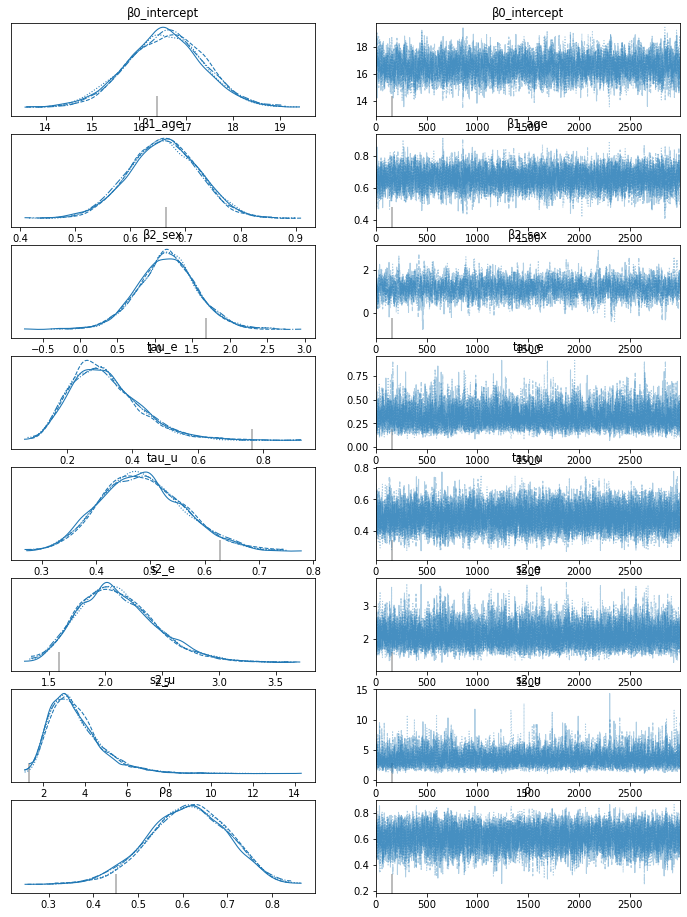

In [259]:
az.plot_trace(tracea, var_names=["~u_i"])